# PREDICTING TITANIC SURVIVAL WITH MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional
%matplotlib inline

# lines below just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train_titanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## MISSING DATA

In [5]:
# round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing=round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
dtype: float64

<AxesSubplot:>

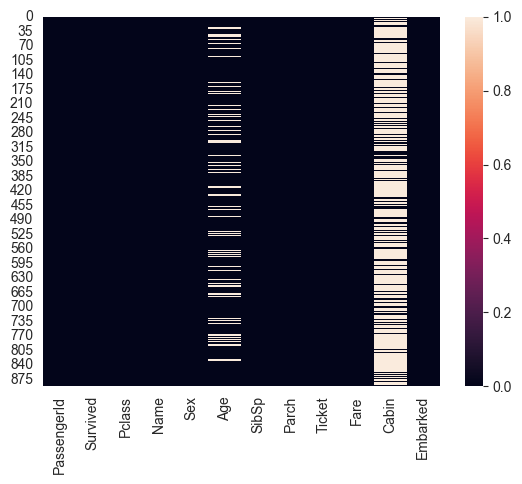

In [6]:
#train.isnull()
sns.heatmap(data=train.isnull())

<AxesSubplot:>

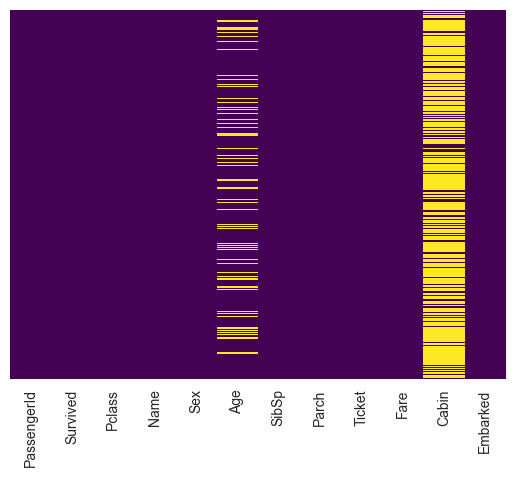

In [7]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

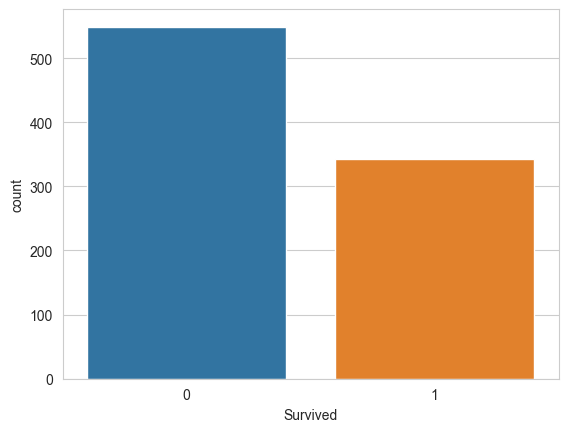

In [8]:
sns.countplot(x='Survived',data=train)#, palette='coolwarm'

<AxesSubplot:xlabel='Survived', ylabel='count'>

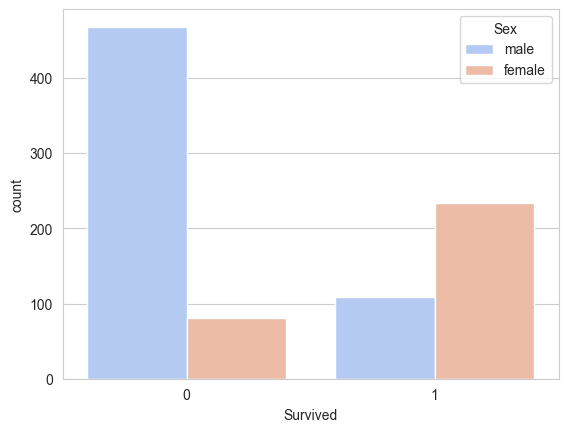

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train, palette='coolwarm')

In [10]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

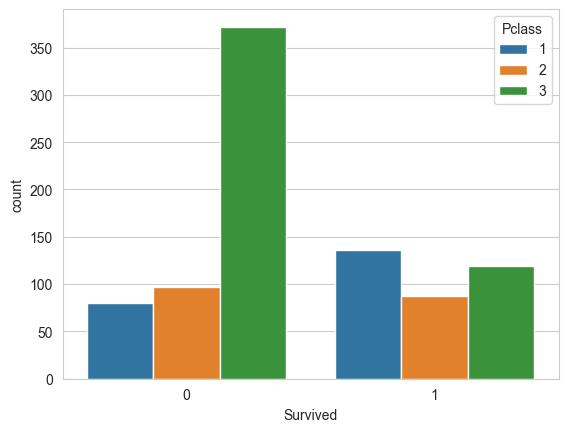

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

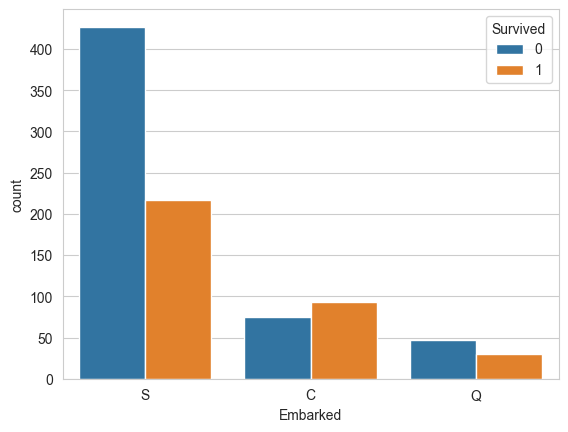

In [12]:
#sns.countplot(x='Parch',data=train,split=True)
sns.countplot(x='Embarked',data=train,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

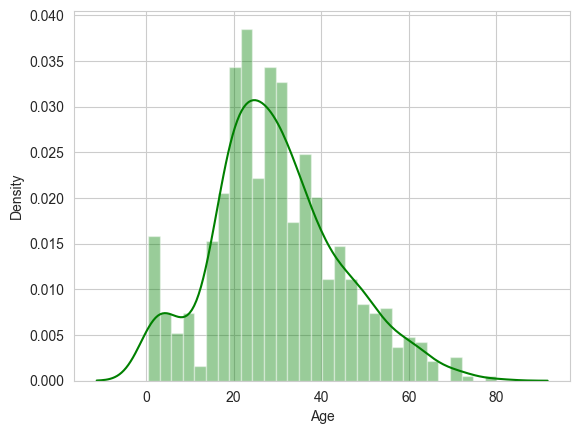

In [13]:
sns.distplot(train['Age'].dropna(),kde=True,color='green',bins=30)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

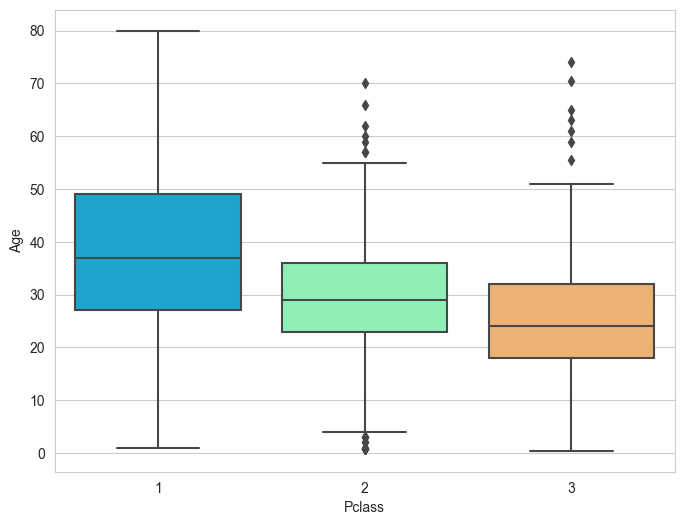

In [14]:
#boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

In [15]:
#fill missing data
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [16]:
def impute_age(age_pclass):        #passing age_pclass as ['Age','Pclass']
    Age=age_pclass[0]
    Pclass=age_pclass[1]
    # filling the missing data
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else :
        return Age

In [17]:
# axis=1 beacaues we want to apply this across the column
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

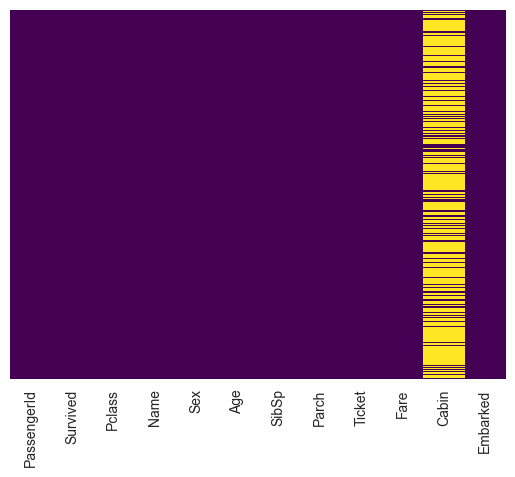

In [19]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

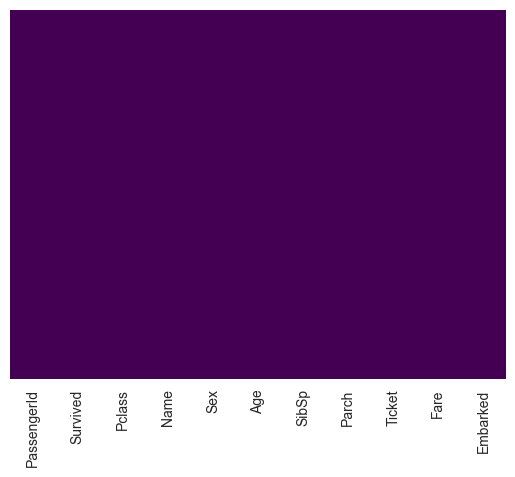

In [21]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

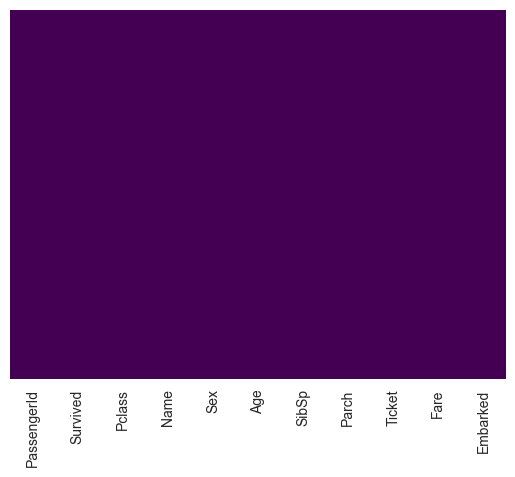

In [22]:
train.dropna(inplace=True)
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Dealing with categorical data

In [23]:
sex=pd.get_dummies(train['Sex'])
# sex=pd.get_dummies(train['Sex']).astype(int)
sex.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [24]:
sex=pd.get_dummies(train['Sex'],drop_first=True)  # To avoid multi collinarity drop_first=True
sex.head(3)

,male
0,1
1,0
2,0


In [25]:
embark=pd.get_dummies(train['Embarked'],drop_first=True) 
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


## MODEL BUILDING

In [30]:
#train test split
x=np.arange(1,25).reshape(12,2)
y=np.array([0,1,1,0,1,0,0,1,1,0,1,0])

In [31]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [32]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [34]:
x_train

array([[19, 20],
       [ 5,  6],
       [ 7,  8],
       [23, 24],
       [21, 22],
       [ 3,  4],
       [ 1,  2],
       [17, 18],
       [ 9, 10]])

In [35]:
x_test

array([[11, 12],
       [13, 14],
       [15, 16]])

In [36]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1, 1])

In [37]:
y_test

array([0, 0, 1])

In [38]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=4,random_state=4)
# random_State tells at that state our output is fix

In [39]:
x_train

array([[17, 18],
       [ 5,  6],
       [23, 24],
       [ 1,  2],
       [ 3,  4],
       [11, 12],
       [15, 16],
       [21, 22]])

In [40]:
x_test

array([[ 7,  8],
       [ 9, 10],
       [13, 14],
       [19, 20]])

In [41]:
y_train

array([1, 1, 0, 0, 1, 0, 1, 1])

In [42]:
y_test

array([0, 1, 0, 0])

In [43]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=4,stratify=y)
#stratify is used to best spliting as we have 6 zeroes in y so it split it in 33%(2 zeroes)

In [44]:
x_train

array([[21, 22],
       [ 1,  2],
       [15, 16],
       [13, 14],
       [17, 18],
       [19, 20],
       [23, 24],
       [ 3,  4]])

In [45]:
x_test

array([[11, 12],
       [ 7,  8],
       [ 5,  6],
       [ 9, 10]])

In [46]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 1])

In [47]:
y_test

array([0, 0, 1, 1])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,shuffle=False)

In [49]:
x_train

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16]])

In [50]:
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [55]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
6,7,1,54.0,0,0,51.8625,1,0,1
576,577,2,34.0,0,0,13.0000,0,0,1
445,446,1,4.0,0,2,81.8583,1,0,1
74,75,3,32.0,0,0,56.4958,1,0,1
670,671,2,40.0,1,1,39.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
107,108,3,25.0,0,0,7.7750,1,0,1
271,272,3,25.0,0,0,0.0000,1,0,1
862,863,1,48.0,0,0,25.9292,0,0,1
436,437,3,21.0,2,2,34.3750,0,0,1


In [56]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
281,282,3,28.0,0,0,7.8542,1,0,1
435,436,1,14.0,1,2,120.0000,0,0,1
39,40,3,14.0,1,0,11.2417,0,0,0
418,419,2,30.0,0,0,13.0000,1,0,1
585,586,1,18.0,0,2,79.6500,0,0,1
...,...,...,...,...,...,...,...,...,...
711,712,1,38.0,0,0,26.5500,1,0,1
840,841,3,20.0,0,0,7.9250,1,0,1
381,382,3,1.0,0,2,15.7417,0,0,0
141,142,3,22.0,0,0,7.7500,0,0,1


In [58]:
Y_train

6      0
576    1
445    1
74     1
670    1
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 595, dtype: int64

In [59]:
Y_test

281    0
435    1
39     1
418    0
585    1
      ..
711    0
840    0
381    1
141    1
174    0
Name: Survived, Length: 294, dtype: int64

## training


In [60]:
from sklearn.linear_model import LogisticRegression
logR =LogisticRegression()

In [61]:
# model is learning the relationship between (X_train) and(Y_train)
logR.fit(X_train,Y_train)

LogisticRegression()

# PREDICTION

In [62]:
#Return an numpy array
#Predict for one observation
logR.predict(X_test[0:10])

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
#make prediction on entire test data
predictions=logR.predict(X_test)

In [64]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

## measuring model performance

In [66]:
#use score method
score=logR.score(X_test,Y_test)
print(score)

0.7959183673469388


In [67]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,predictions)

## confusion matrix

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [70]:
#confusion matrix tells how the data is predicted correctly or incorrectly-->diagonal represent the false predictions
#(0-->1,1-->0)
cm=metrics.confusion_matrix(Y_test,predictions)
print(cm)

[[157  27]
 [ 33  77]]


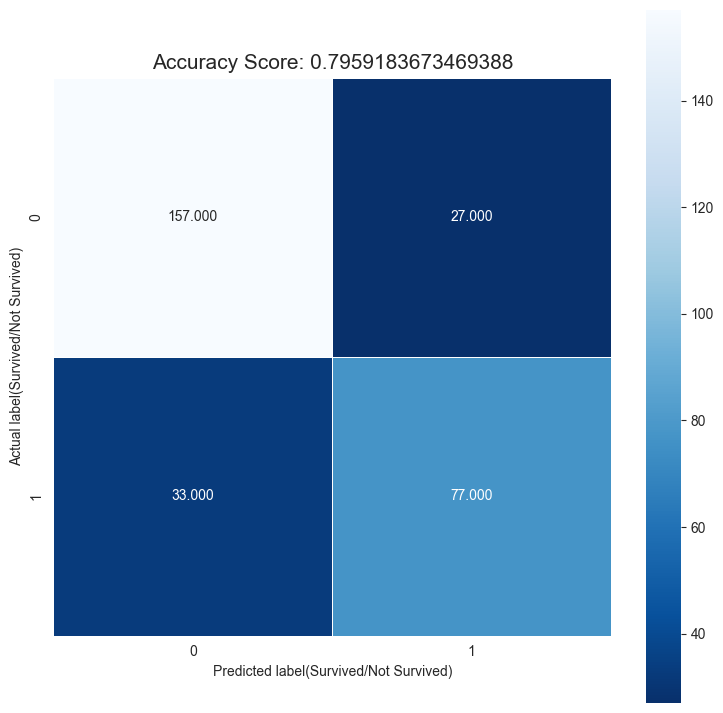

In [71]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label(Survived/Not Survived)');
plt.xlabel('Predicted label(Survived/Not Survived)');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);